### Dataset
- Nesse trabalho vou explorar uma conhecida base, iris dataset.
- Nela encontramos informações sobre algumas características de flores que queremos classificar

### Objetivo Geral
- Gerar modelos de classificação capazes de diferenciar tipos de flores da base iris dataset

### Objetivos Específicos
- Trabalhar de maneira mais direcionada com o modelo: K-means
- Estudar os conceitos de Overfitting x Underfitting

### Fonte
- Projeto pessoal com os assuntos abordados no módulo: <br>
    'Supervised Learning with scikit-learn - Classification', da plataforma DataCamp, trilha 'Machine Learning Scientist with Python'
- As imagens foram retiradas dos slides da aula

# Importando Bibliotecas

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

# DataSet
from sklearn import datasets

# Modelo
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Compreensão Base
### Visualização Inicial

In [68]:
# Importando base de Dados
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [69]:
# Analise inicial
type(iris)

sklearn.utils.Bunch

- 'Bunch' é um tipo de variavel, praticamente igual a um dicionário

In [70]:
# Chaves
print(iris.keys())
#print(iris.values())
#print(iris.items())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [71]:
# Avaliando Target Variable
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [72]:
# Gerando Pandas DataFrame
X = iris.data
y = iris.target
df = pd.DataFrame(X, columns=iris.feature_names)
display(df.head())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


- X: variáveis preditivas (Features, independet variables)
- y: variável alvo (Target variable, dependent variable, reponse variable)

### Análise Inicial

In [73]:
df.isnull().sum().sort_values(ascending = False)

petal width (cm)     0
petal length (cm)    0
sepal width (cm)     0
sepal length (cm)    0
dtype: int64

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [75]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [76]:
df.skew().sort_values(ascending = False)

sepal width (cm)     0.318966
sepal length (cm)    0.314911
petal width (cm)    -0.102967
petal length (cm)   -0.274884
dtype: float64

- Aparentemente não dados vazios
- Base contém apenas dados numéricos
- Não há valores muito discrepantes entre as escalas das colunas
- As colunas Sepal width e Sepal length possuem assimentra positiva, enquanto as colunas Petal width e Petal length possuem assimetria negativa, mas nada muito acentuado

# Exploratory Data Analysis (EDA)
### Análise Geral

<AxesSubplot:>

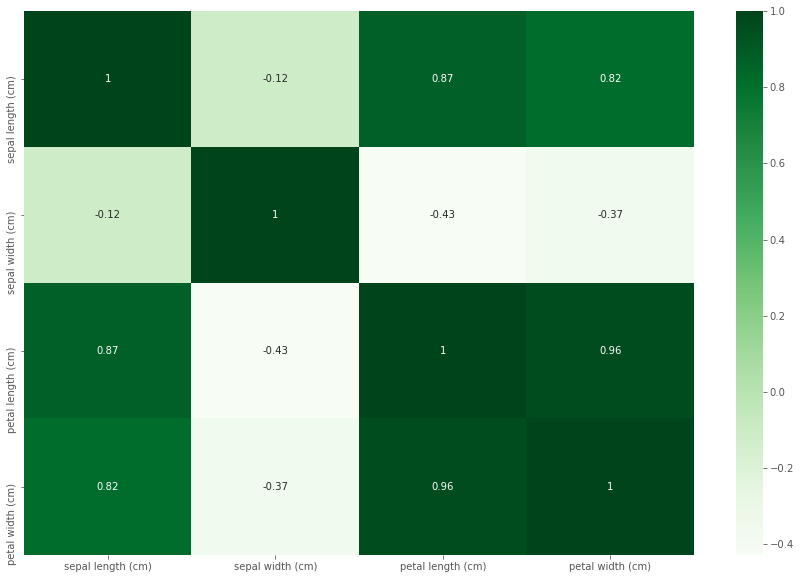

In [77]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='Greens')

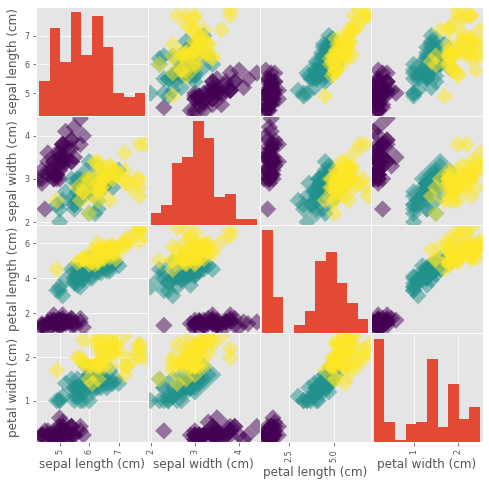

In [78]:
x = pd.plotting.scatter_matrix(df, c = y,
                           figsize = [8,8],
                           s = 150,
                           marker = 'D')

- ScatterPlot das colunas segmentadas pelo valor da coluna 'y' (Dependent Variable)
- Na diagonal estão os histogramas das colunas
- Existe para o gráfico 'petal width' x 'petal length' temos 3 clusters bem definidos
- No geral, existe forte correlação positiva entre todas as colunas, menos as que envolvem a coluna Sepal width. Isso é esperado, pois são informações de dimensões de flores

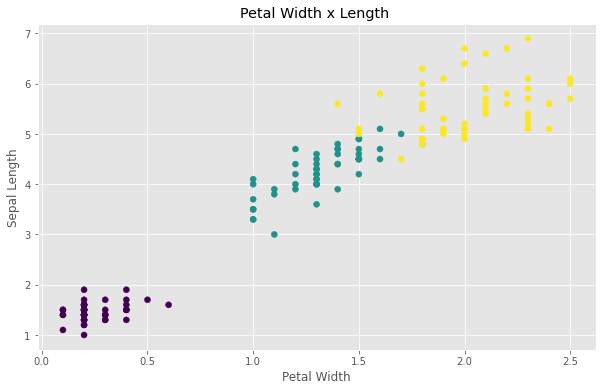

In [79]:
# Inserindo coluna target
df['target'] = iris.target

# Visuallização
plt.figure(figsize = (10,6))
plt.scatter(x=df['petal width (cm)'], y=df['petal length (cm)'], c = df['target'])
plt.xlabel('Petal Width')
plt.ylabel('Sepal Length')
plt.title('Petal Width x Length ')
plt.show()

- Vemos claramente os 3 grupos: <br>
    1: Setosa <br>
    2: Versicolor <br>
    3: Virginica <br>

# Modelo - K-Nearest Neighbors
- Nesse Projeto o objeto é trabalhar especificamente com o modelo de classificação K-Nearest Neighbors
- O nome do modelo ja da uma boa pista sobre seu funcionamento, esse modelo leva em conta os pontos mais próximos da variável alvo e julga ela baseada em seus vizinhos
- Ou seja, digamos que queremos classifcar um valor que está perto de vários outros pontos (seus vizinhos), caso a maior parte deles tenha uma classificação arbitrária 'x', então provavelmente esse ponto que queremos classificar também será 'x'!
- A quantidade de vizinhos que levamos em consideração impacta e muito no treinamento do modelo! Se escolhermos um valor errado de 'vizinhos' podemos ter problemas relacionados a 'Overfitting' e 'Underfitting'

### Entendimento do modelo
- Vamos avaliar como funciona a forma de classificação levando em conta 3 vizinhos

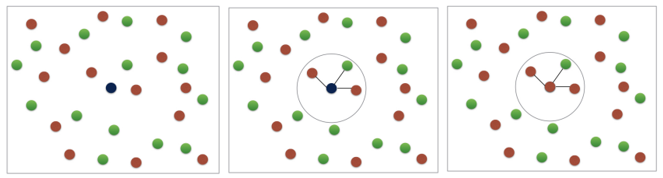

- Queremos classificar o ponto em azul escuro
    1. Primeiro avaliamos os 3 'vizinhos' mais próximos
    2. Julgamos o ponto baseado nos pontos mais próximos
    
 
- Lembra do ditado: 'Diga com quem tu andas e direi quem tu és', exatamente a mesma coisa
- Mas você pode se perguntar, será mesmo que esse valor tem tanta importância assim?
- Vamos avaliar agora levando em conta 5 vizinhos

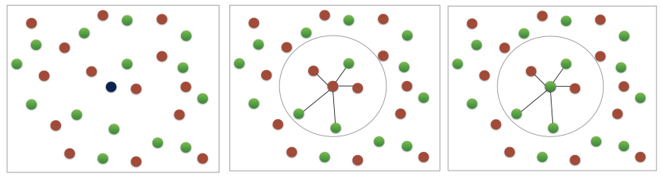

- Veja que a classificação mudou!
- Agora sabemos que o valor importa sim
- Posteriormente vamos ver como achar o valor ótimo para esse hiperparâmetro

### Treinamento do modelo

In [80]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X = df.drop('target', axis = 1).values
y = df['target'].values
# Tanto X como y foram transformados em Numpy arrays

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15, stratify=y)

# Definindo número de vizinhos igual a 6 (Teste)
knn = KNeighborsClassifier(n_neighbors=6)

# Treinando o modelo
knn.fit(X_train, y_train)

# Prevendo em dados nunca antes vistos
y_pred = knn.predict(X_test)
print(f'Valores previstos:\n {y_pred}')

Valores previstos:
 [0 1 0 2 2 0 2 0 2 2 1 0 0 0 1 2 1 0 2 2 1 1 0 2 2 1 0 1 1 1 2 0 2 0 2 1 0
 2 1 1 0 1 2 0 1]


### Prevendo novo dado

In [88]:
# Definindo novo valor
X_new = np.array([[5.6, 2.8, 3.9, 1.1]])

prediction = knn.predict(X_new)
print(prediction)

[1]


In [89]:
# Atenção!
# Os novos dados de entrada obviamente precisam ter os mesmo formato dos dados de treino!
print(X_new.shape, X_train.shape)

(1, 4) (105, 4)


### Avaliando a acurácia do modelo

In [81]:
knn.score(X_test, y_test)

0.9555555555555556

- Como seria possível falar que o modelo é eficiente para prever novos dados?
- Ou melhor, como é possível saber que esse é o melhor valor para o Hiperparâmetro n_neighbors?
- Também precisamos avaliar se o modelo se ajustou bem aos dados?
- Para avaliar todos esses pontos, será necessário estudar 2 conceitos: Underfitting x Overfitting

# Underfitting x Overfitting
- Underfitting: Modelo ainda não foi capaz de incorporar adequadamente o comportamento dos dados, precisa de mais observações
- Overfitting: Modelo ficou muito restrito aos dados de teste, dificuldade em analisar dados nunca vistos

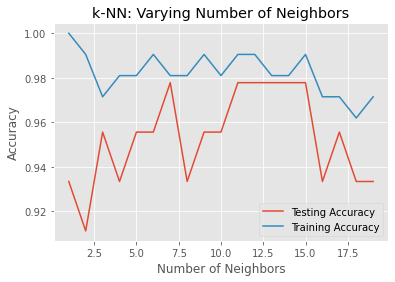

In [82]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 20)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors = k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)
    
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

- Quando acompanhamnos a acurácia do modelo em função do número de vizinhos vemos que o valor varia bastante em função do valor de vizinhos
### Testing Accuracy <br>

- Para valores muito pequenos de vizinhos (<5) temos uma acurácia baixa/menor indicando overfitting. Isso se deve ao fato que o modelo se tornou muito específico aos dados de treino, ou seja, ele ficou especialista neles, não sendo capaz de identificar com a mesma eficiente dados que nunca teve contato. No geral, para o modelo KNN baixos valores de vizinhos (k) levam a modelos mais complexos e pode levar ao overfitting mais facilmente

- Para valores muito altos de vizinhos (>15) temos uma acurácia baixa também indicando underfitting. Isso ocorreu pois com pouco número de vizinhos o modelo não foi capaz de incorporar os padrões dos dados, não sendo eficiente em previsões de dados nunca antes vitos. No geral, para o modelo KNN altos valores de vizinhos (k) levam a modelos menos complexos, a linha de decisão normalmente é mais suave, porém modelos com baixa complexidade podem levar mais facilmente ao underfitting

### Decision boundary
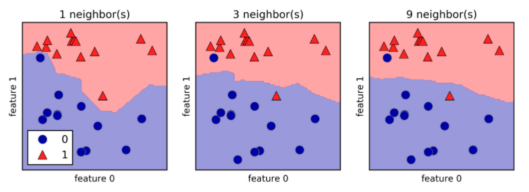
- Observe como a divisão é muito mais suave quando consideramos um número maior de vizinhos
- Número baixo de vizinhos deixa o modelo mais tendencioso

### Optimal value of K<br>
- Para a faixa entre 11 e 15 vizinhos temos uma certa constância no valor de acurácia do modelo, sendo também a faixa com o maior valor. Além disso, ao longo dessa faixa os valores de Teste e Treino são bem próximos. Assim 11 seria o número ideal de vizinhos para o nosso modelo